In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data1.csv')

df['not_happened_yet_date']=pd.to_datetime(df['not_happened_yet_date'],format='%d/%m/%Y')
df['year']=df['not_happened_yet_date'].dt.year
df['month']=df['not_happened_yet_date'].dt.month
df['day']=df['not_happened_yet_date'].dt.day
df=df.drop(['Unnamed: 0'],axis=1)

df['from_totally_fake_account']=df['from_totally_fake_account'].astype(int).astype(str)

In [3]:
display(df)
print(df.info())

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,location_type,year,month,day
0,10371,4.00,CINEMA,2025-01-01,2,2025,1,1
1,88339,2.40,40544,2025-01-01,9,2025,1,1
2,18555,2.40,85149,2025-01-01,9,2025,1,1
3,18555,4.10,HIPSTER_COFFEE_SHOP,2025-01-01,1,2025,1,1
4,80792,1.95,18555,2025-01-01,9,2025,1,1
...,...,...,...,...,...,...,...,...
10148275,32185,2.65,COFFEE_SHOP,2025-12-31,1,2025,12,31
10148276,32185,2.45,COFFEE_SHOP,2025-12-31,1,2025,12,31
10148277,57569,14.00,WINE_BAR,2025-12-31,5,2025,12,31
10148278,1490,9.00,57569,2025-12-31,9,2025,12,31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 8 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   from_totally_fake_account      object        
 1   monopoly_money_amount          float64       
 2   to_randomly_generated_account  object        
 3   not_happened_yet_date          datetime64[ns]
 4   location_type                  int64         
 5   year                           int64         
 6   month                          int64         
 7   day                            int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 619.4+ MB
None


## 挑选随机单一用户（也可查找）

In [4]:
col_to_exp=df.columns.drop('from_totally_fake_account')
df_sample=(df
           .groupby('from_totally_fake_account')
           .agg(list)
           .sample(n=1) #.loc[df['from_totally_fake_account']==name]
           .explode(list(col_to_exp))
           .reset_index(drop=True)
          )
df_sample['day_of_week']=df_sample['not_happened_yet_date'].dt.dayofweek.astype(object)
df_sample=df_sample.iloc[:,[0,3,5,6,7]]

display(df_sample)

,monopoly_money_amount,location_type,month,day,day_of_week
0,5.0,1,1,1,2
1,2.65,1,1,1,2
2,2.2,1,1,1,2
3,132.71,7,1,1,2
4,6.0,1,1,2,3
...,...,...,...,...,...
1347,194.0,3,12,30,1
1348,6.0,9,12,31,2
1349,3.0,1,12,31,2
1350,2.25,1,12,31,2


## 种类-金额占比

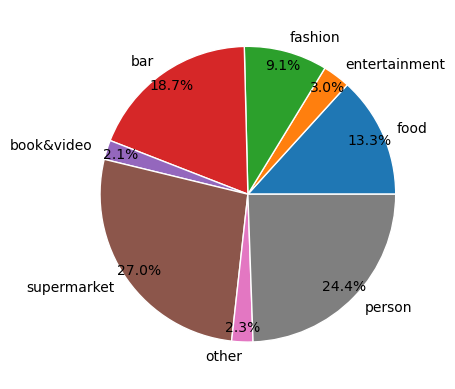

In [5]:
df_temp=(df_sample
         .groupby('location_type')
         .agg('sum')
         .sort_values(['location_type'])
         .iloc[:,[0]]
        )
type_dict=['food','entertainment','fashion','sports','bar','book&video','supermarket','other','person']
type_index=[1,2,3,4,5,6,7,8,9]
for n in type_index:
    if n not in df_temp.index.values:
        type_dict.pop(n-1)

plt.pie(df_temp['monopoly_money_amount'],
        labels=type_dict,
        autopct='%.1f%%',
        pctdistance=0.9,
        wedgeprops={"edgecolor":"white",
                    'linewidth':1,
                    'antialiased': True}
       )
plt.show()

## 星期-金额占比

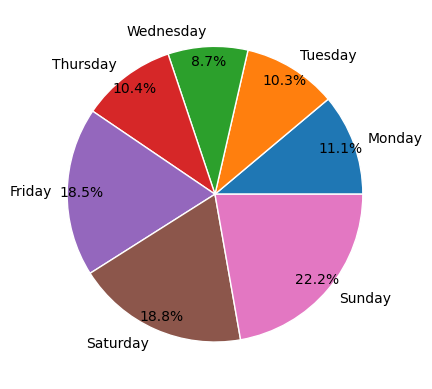

In [6]:
df_temp=(df_sample
         .groupby('day_of_week')
         .agg('sum')
         .sort_values(['day_of_week'])
         .iloc[:,[0]]
        )
type_dict=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
type_index=list(range(7))
for n in type_index:
    if n not in df_temp.index.values:
        type_dict.pop(n)

plt.pie(df_temp['monopoly_money_amount'],
        labels=type_dict,
        autopct='%.1f%%',
        pctdistance=0.9,
        wedgeprops={'edgecolor':'white',
                    'linewidth':1,
                    'antialiased': True}
       )
plt.show()

## SVR

In [7]:
df_sample[1:]=df_sample[1:].astype(str)
one_hot_encoded=pd.get_dummies(df_sample[['location_type','month','day','day_of_week']])
df_encoded=pd.concat([df_sample,one_hot_encoded],axis=1).drop(['location_type','month','day','day_of_week'],axis=1)
display(df_encoded)

,monopoly_money_amount,location_type_1,location_type_1,location_type_2,location_type_3,location_type_5,location_type_6,location_type_7,location_type_8,location_type_9,...,day_8,day_9,day_of_week_2,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,5.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2.65,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,132.71,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,6.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,194.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1348,6.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1349,3.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1350,2.25,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
X=df_encoded.iloc[:,1:].values
y=df_encoded.iloc[:,0].values.reshape(-1,1)

In [9]:
from sklearn.preprocessing import StandardScaler
X_sc=StandardScaler()
y_sc=StandardScaler()
X_train=X_sc.fit_transform(X)
y_train=y_sc.fit_transform(y)

In [10]:
from sklearn.svm import SVR
regrassor=SVR(kernel='rbf')
regrassor.fit(X_train,np.ravel(y_train,order="c"))

SVR()

In [11]:
y_pred=regrassor.predict(X_sc.transform(X))
y_pred=y_sc.inverse_transform(y_pred.reshape(-1,1))

In [12]:
y=y.flatten()
df_result=pd.DataFrame({'Predicted Value':np.ravel(y_pred,order="c"),'Real Value':y})
pd.set_option('display.max_rows',None)  
display(df_result)
pd.reset_option('display.max_rows')  

,Predicted Value,Real Value
0,9.039442,5.0
1,6.233483,2.65
2,6.233483,2.2
3,77.493599,132.71
4,6.184572,6.0
5,6.029516,2.0
6,3.166708,3.5
7,4.988827,4.5
8,10.808533,9.5
9,3.166708,2.15


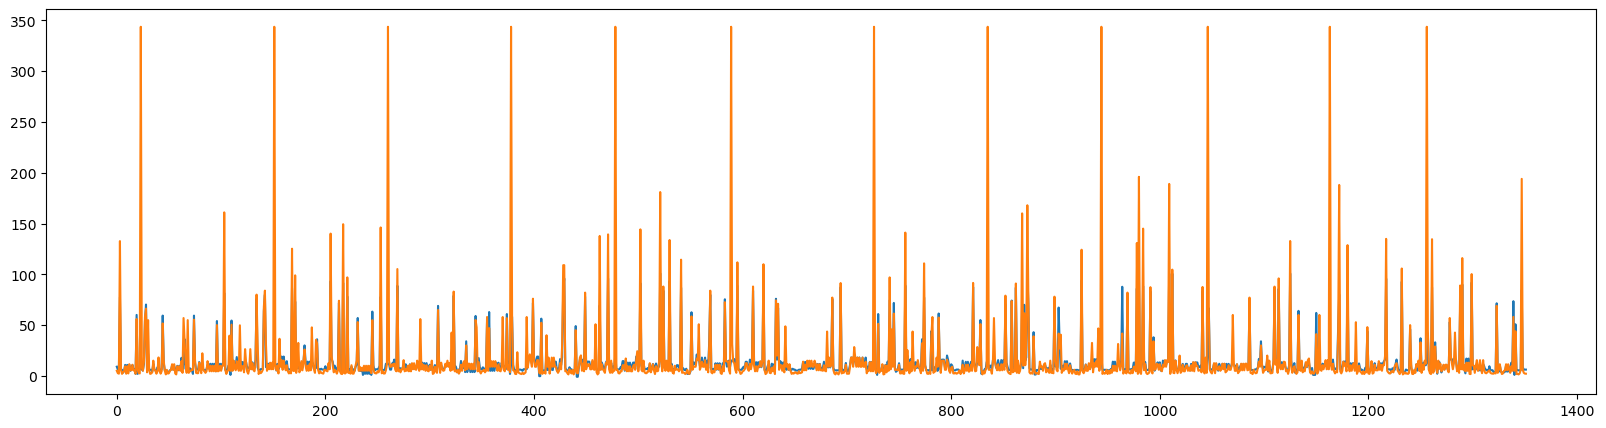

In [13]:
plt.figure(figsize=(20, 5))
plt.plot(df_result['Predicted Value'])
plt.plot(df_result['Real Value'])
plt.show()

In [14]:
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2=r2_score(y,y_pred)
rmse=math.sqrt(mean_squared_error(y,y_pred))

print('r2 score: '+str(r2))
print('RMSE: '+str(rmse))

r2 score: 0.3333509455340993
RMSE: 32.90456424313508


## 笔记
* 待添加：对应单用户的商户分类（用于推荐）
* 待添加：余额相关
* 所有可以整合到一个方程内